# **Instagram Post Reach Prediction using Python**

by Jay Gohil

---

# **Importing necessary libraries**

---

In [ ]:
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the dataset**

---

In [ ]:
#Reading CSV file
df = pd.read_csv('https://raw.githubusercontent.com/github-goog/colab/main/instagram_dataset.csv')

#Displaying top of CSV
df.head(15)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,time
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139,11
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23,2
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,2
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49,3
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,3
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18,3
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35,3
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86,4
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22,4
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18,7


# **Dropping unnecessary columns**

---

In [ ]:
#Dropping irrelevant columns
df = df.drop(df.columns[[0]], axis=1)
df = df.drop(['S.No','USERNAME', 'Caption', 'Hashtags', 'Time since posted'], axis=1)
#print(df) [All colums are dropped now]

In [ ]:
#Displaying updated dataset
df.head(15)

,Followers,Likes,time
0,1600,139,11
1,880,23,2
2,255,25,2
3,340,49,3
4,304,30,3
5,1231,18,3
6,259,35,3
7,1433,86,4
8,13,22,4
9,450,18,7


# **Visualizing the dataset**

---

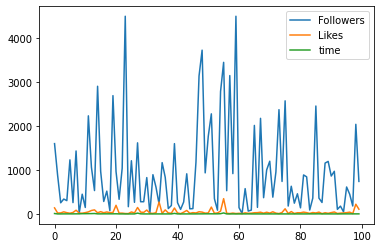

In [ ]:
# plotting a simple graph
df.plot()

Visualizing correlation between features using heatmap -->



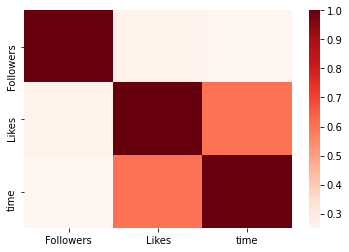

In [ ]:
#Checking correlation among features
print("Visualizing correlation between features using heatmap -->\n")
sns.heatmap(df.corr(method="pearson"), cmap='Reds')
#method="pearson"
#cmap='Reds'

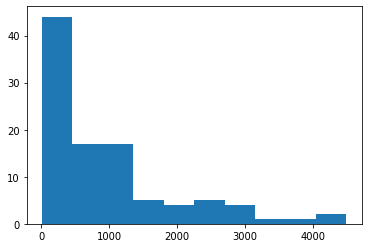

In [ ]:
plt.hist(df["Followers"])
plt.show()

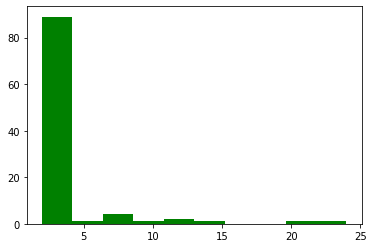

In [ ]:
plt.hist(df["time"], color=['green'])
plt.show()

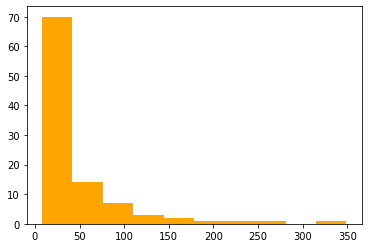

In [ ]:
plt.hist(df["Likes"], color=['orange'])
plt.show()

# **Preparing the dataset for Machine Learning**

---

In [ ]:
#Drppoing 'Likes' column from 'X' and adding it into 'y'
X = df.drop('Likes', axis=1)
y = df[['Likes']]

print("X dataset --> ")
print()
print(X)
print()
print()
print("Y dataset --> ")
print()
print(y)
print()

X dataset --> 

    Followers  time
0        1600    11
1         880     2
2         255     2
3         340     3
4         304     3
..        ...   ...
95        614     3
96        450     3
97        182     3
98       2039     3
99        741     3

[100 rows x 2 columns]


Y dataset --> 

    Likes
0     139
1      23
2      25
3      49
4      30
..    ...
95     31
96     42
97     10
98    222
99    109

[100 rows x 1 columns]





AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


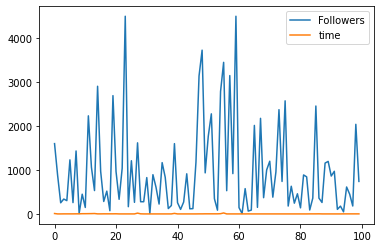

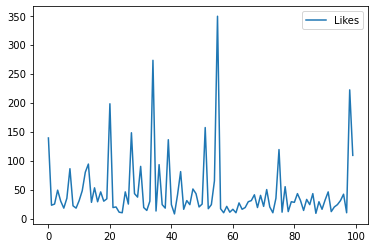

In [ ]:
print()
plot1 = X.plot()
print()
plot2 = y.plot()

print(plot1)
print(plot2)

In [ ]:
#Splliting the dataset into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

while True:
  print("Dataset split completed!")
  break

Dataset split completed!


# **Creating ML multivariate regression model**

---

In [ ]:
#Training the model
reg = LinearRegression()
reg.fit(X_train[['Followers','time']], y_train)

while True:
  print("Model training complete!")
  break

Model training complete!


# **Making predictions on test dataset**

---

In [ ]:
#Making prediction on test dataset
y_predicted = reg.predict(X_test[['Followers','time']])

print(y_predicted)

[[ 29.32141621]
 [ 40.01992577]
 [ 31.15514132]
 [ 32.23977022]
 [ 29.47357638]
 [ 50.47653967]
 [ 32.03298845]
 [ 32.07200388]
 [ 32.68844764]
 [ 36.63290742]
 [ 29.18876375]
 [153.05289191]
 [ 30.8430179 ]
 [ 49.80547431]
 [ 57.33155037]
 [ 32.26317948]
 [ 28.82201873]
 [ 29.23558227]
 [ 29.73497974]
 [ 78.5378731 ]]


# **Visualizing predictions**

---

Actual values -->
[28, 33, 30, 43, 20, 46, 93, 31, 40, 29, 12, 136, 17, 17, 157, 14, 19, 16, 12, 31]

Predicted values -->
[29, 40, 31, 32, 29, 50, 32, 32, 32, 36, 29, 153, 30, 49, 57, 32, 28, 29, 29, 78]





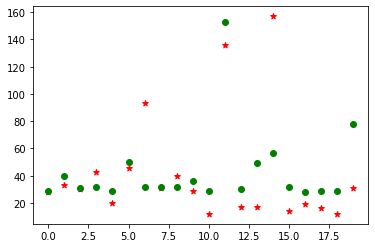

In [ ]:
temp1 = []
temp2 = []
temp3 = []

for i in range(len(y_test.values)):
  temp1.append(int(y_test.values[i]))

for i in range(len(y_predicted)):
  temp2.append(int(y_predicted[i]))

for i in range(len(y_predicted)):
  temp3.append(i)

#Printing original values
print("Actual values -->")
print(temp1)

#Printing predicted values
print("\nPredicted values -->")
print(temp2)

print(temp3)

print("\n"*2)

plt.scatter(temp3, temp1, marker="*", color = 'red')
plt.scatter(temp3, temp2, color = 'green')

# **Evaluating model**

---

In [ ]:
#Printing the prediction's MSE value
pred = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error   --> %.5f" % pred)

Mean Squared Error   --> 953.76172


# **Making prediction on custom values**

---

In [ ]:
#Making prediction on custom value
custom_pred = reg.predict([[1000,3]])
print("The prediction for custom values : %.5f" % custom_pred[0][0])

The prediction for custom values : 42.51301


# **Thank you!**

---